# **Introduction**
[Time](http://time.com/) is an American weekly news magazine and news website published in New York City. It was founded in 1923 and originally run by Henry Luce.

Time has the world's largest circulation for a weekly news magazine. The print edition has a readership of 26 million, 20 million of whom are based in the United States. In mid-2012, its circulation was over three million, which had lowered to two million by late 2017.

The uploaded dataset sheds light on how gender diversity is maintained while choosing cover pictures for the magazine since their beginning in 1923 till 2013. 

Does Time really abide by equality? In this world of media having infiltrated our lives to the greatest extent, is Time a responsible bearer of gender miscellany? These are the few questions I tried to address via the dataset. 


# **Exploratory Analysis**
## A. Importing libraries
To begin this exploratory analysis, we first import libraries and define functions for plotting the data using `matplotlib`, `numpy` and `pandas`. We then show how the gender demography has shaped itself on the covers of Time over a period of 80 years. 

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## B. Accessing the data
There is 1 csv file in the current version of the dataset:


In [2]:
print(os.listdir('../input'))

['TIMEGenderData.csv']


## C. Reading the data
We read the data and store it in a dataframe using `read_csv`.

In [3]:
data = pd.read_csv("../input/TIMEGenderData.csv")

## D. Analysing the data
Take a look how the data looks like. 

In [4]:
data.head()

,Year,Female,Male,Total,Female %,Male %
0,1923,1,34,35,2.86%,97.14%
1,1924,4,48,52,7.69%,92.31%
2,1925,1,51,52,1.92%,98.08%
3,1926,7,46,52,13.46%,88.46%
4,1927,4,49,52,7.69%,94.23%


We see from `data.head()` that `data` has 5 columns. 
* **Year** - The year of release.
* **Female** - The number of female personalities in issues for that whole year. 
* **Male** - The number of female personalities in issues for that whole year. 
* **Total** - Total number of issues in the year.
* **Female %** - `Female/Total * 100%`
* **Male %** - `Male/Total * 100%`


Teasing the data more, 

In [5]:
data.describe()

,Year,Female,Male,Total
count,91.00000,91.000000,91.000000,91.000000
mean,1968.00000,5.835165,39.549451,45.362637
std,26.41338,3.163204,7.968359,6.433448
min,1923.00000,1.000000,20.000000,26.000000
25%,1945.50000,4.000000,33.000000,41.000000
50%,1968.00000,5.000000,41.000000,47.000000
75%,1990.50000,7.000000,46.000000,51.000000
max,2013.00000,18.000000,51.000000,52.000000


We see that from the above table *there are no null values for any column in the whole dataframe*.

And already, when we look at the `max` values in the description, the difference is... . Umm, let's wait for that. 

When we think of what we need to plot the data, i.e., how gender demography on the covers changed over the years, we can assume that we need the percentage values of both Female and Male covers. 
But we have two problems here. 
* The percentage values are float values, on looking at it first, and we cannot plot floats on, say, a stacked bar graph (which is the plan how I will plot the data finally).
* If we check the type of values in ther percentage columns, we see

In [6]:
type(data['Female %'][0])

str

The percentage values are `string` values here. So apparently we cannot use them, unless we turn them first into `float` and then into `int` to be plotted.

We could have easily done this by typecasting `string` to `float` and then to `int`. But there is another catch. The percentage values are appended by a `%` symbol. 

To expunge this problem, again, we can do two things. 
* Trim the symbol from the values and typecast.
* Calculate the percentage from scratch.

I personally prefer calculating the percentage values from scratch since we already have the numbers given too. And hence, we will proceed with that here. But the first approach can be used too. 

## E. Modifying the data
<br>
First we drop the columns from the frame which cannot be used. 

In [7]:
data = data.drop (['Female %', 'Male %'], axis = 1)

Now we calculate the percentage values by using data from the frame. 

In [8]:
femaleperc = []
femaleperc = data.Female/data.Total * 100

maleperc=[]
maleperc = data.Male/data.Total * 100

We also have to change the `float` values in arrays to `int` values to be plotted. 

In [9]:
femaleperc = [int(x) for x in femaleperc]
maleperc = [int(x) for x in maleperc]

Now we add two more columns in the frame and assign these calculated percentage values to those columns. 

In [10]:
data = data.assign(FemalePerc = femaleperc)
data = data.assign(MalePerc = maleperc)

Now, we take a look at `data` again, checking whether what we did worked and we can work with the data now. 

In [11]:
data.head()

,Year,Female,Male,Total,FemalePerc,MalePerc
0,1923,1,34,35,2,97
1,1924,4,48,52,7,92
2,1925,1,51,52,1,98
3,1926,7,46,52,13,88
4,1927,4,49,52,7,94


Yay! Our problem is solved. We have the percentage values in `int` which we can now plot on a beautiful stacked bar chart.

# **Visualization of Data**
<br>
The percentage values have been converted, not typecasted, from `float` to `int` here and hence what we popularly call as **rounded** values in mathematics have not been taken. The conversion has been done by **flooring** the values. 

For example, `2.86` should have been rounded to `3` but has been floored to `2`. 

And because of this, we get discrepancies in the sum of the two percentages. What we need to create beautiful stacked bars is a constant sum of percentages (Male and Female), else some bars will have a height lesser or more than others. 

To fix this issue, we perform a simple trick. What we do is we find out the rows whose sum of `MalePerc` and `FemalePerc` is not equal to `100` (because we know the sum of percentages should always be `100`) and adjust any one of `MalePerc` or `FemalePerc` such that the sum is equal to 100. This process is actually a work-around for **rounding** the values, which we did not do while conversion.

In [12]:
for i,row in data.iterrows():
    sum = data.FemalePerc[i] + data.MalePerc[i]
    if sum > 100: #Check whether there is any sum value above 100
        diff = sum - 100 #Find out the difference
        data.MalePerc[i] = data.MalePerc[i] - diff
        #We modify the MalePerc values for adjusting the difference. 
    elif sum < 100: #Check whether there is any sum value less than 100
        diff = 100 - sum
        data.MalePerc[i] = data.MalePerc[i] + diff

Now if we check the sum of percentages for regularizing the data,

In [13]:
for i,row in data.iterrows():
    sum = data.FemalePerc[i] + data.MalePerc[i]
    if sum != 100:
        print ("Error") #Print Error if anyone of the row's sum of percentages in not 100.

We run this above cell, but we do not get any message saying `Error`. Hence, we are good to go now! 

Now finally we can proceed to making the plot. 
<br>
## A. Plotting on a Stacked Bar Graph

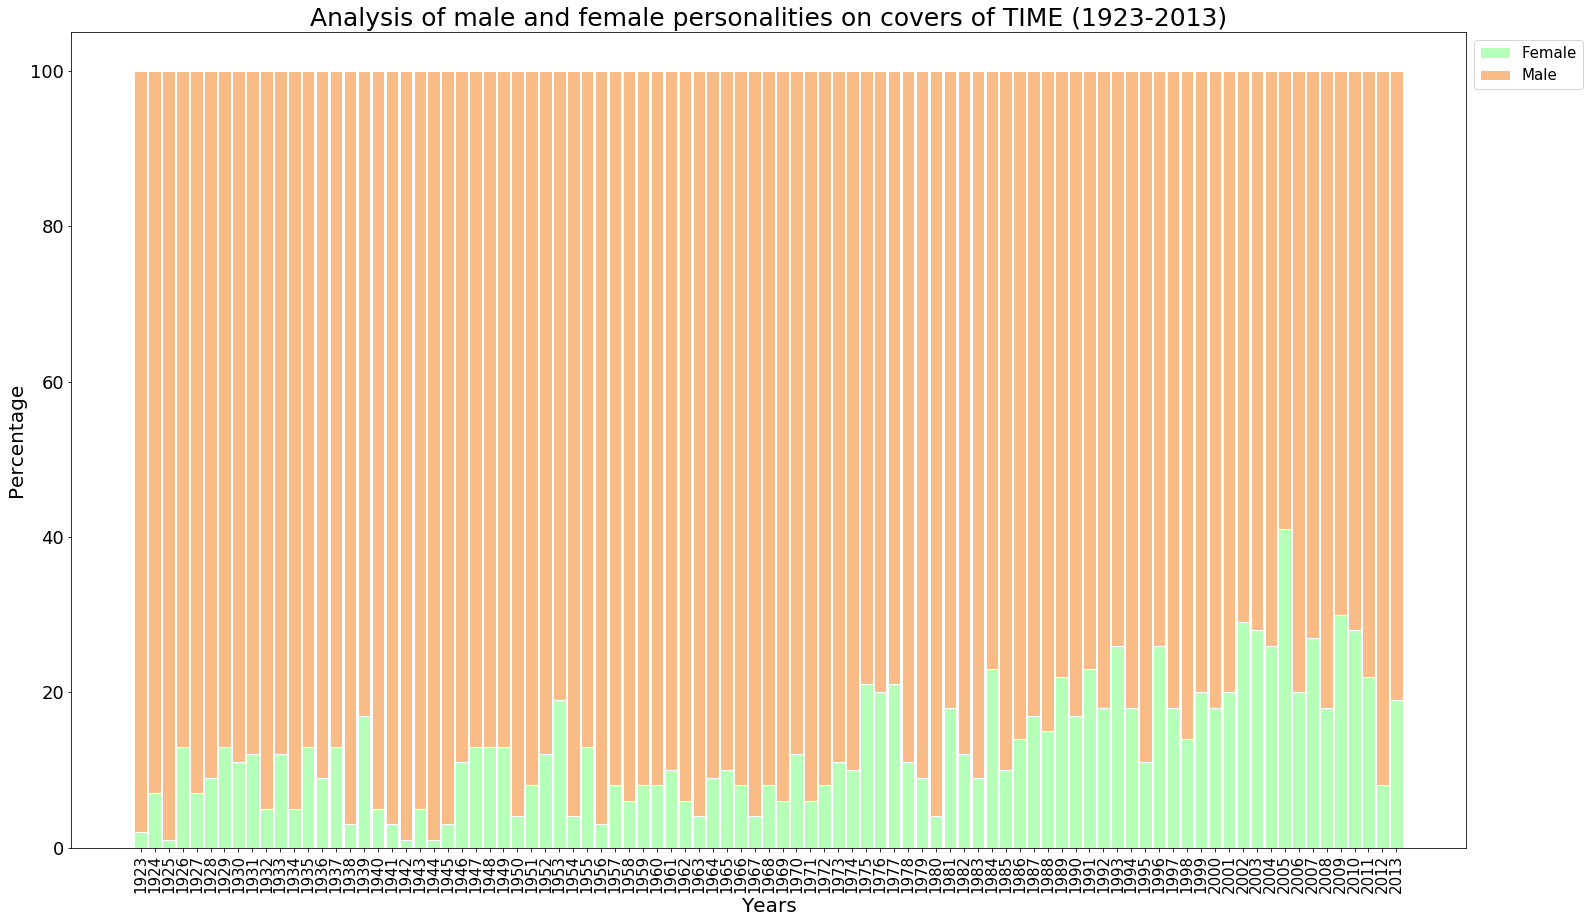

In [14]:
#Plotting the data using a Stacked Bar Graph
plt.figure(figsize=(25,15)) #Setting the figure size 
barWidth = 0.9 #Setting width of each bar
x_values = data.Year #For setting the x-axis values as the Years of the publications
plt.bar(x_values, data.FemalePerc, color='#b5ffb9', edgecolor='white', width=barWidth, label='Female')
plt.bar(x_values, data.MalePerc, bottom=data.FemalePerc, color='#f9bc86', edgecolor='white', width=barWidth, label='Male')
plt.xticks(x_values, rotation=90, fontsize=15)
plt.yticks(fontsize=18)
plt.legend(bbox_to_anchor=(1,1), loc=2, prop={'size':15})
#bbox_to_anchor makes legend visible outside the graph. The placement of the legend follows a different x and y-axes than the graph. For the axes which are followed by 
#legend, (0,0) is lower left point of the chart and (1,1) is the upper rightmost point of the chart. That is why the location is (1,1) such that the legend box
#is just at the upper rightmost part of the chart. loc=2 indicates upper right corner. And prop is the size of the legend.
plt.xlabel('Years', fontsize=20)
plt.ylabel('Percentage', fontsize=20, rotation=90)
plt.title('Analysis of male and female personalities on covers of TIME (1923-2013)', fontsize = 25)
plt.show()

## B. Plotting on a Scatter Plot with a Regression Line

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


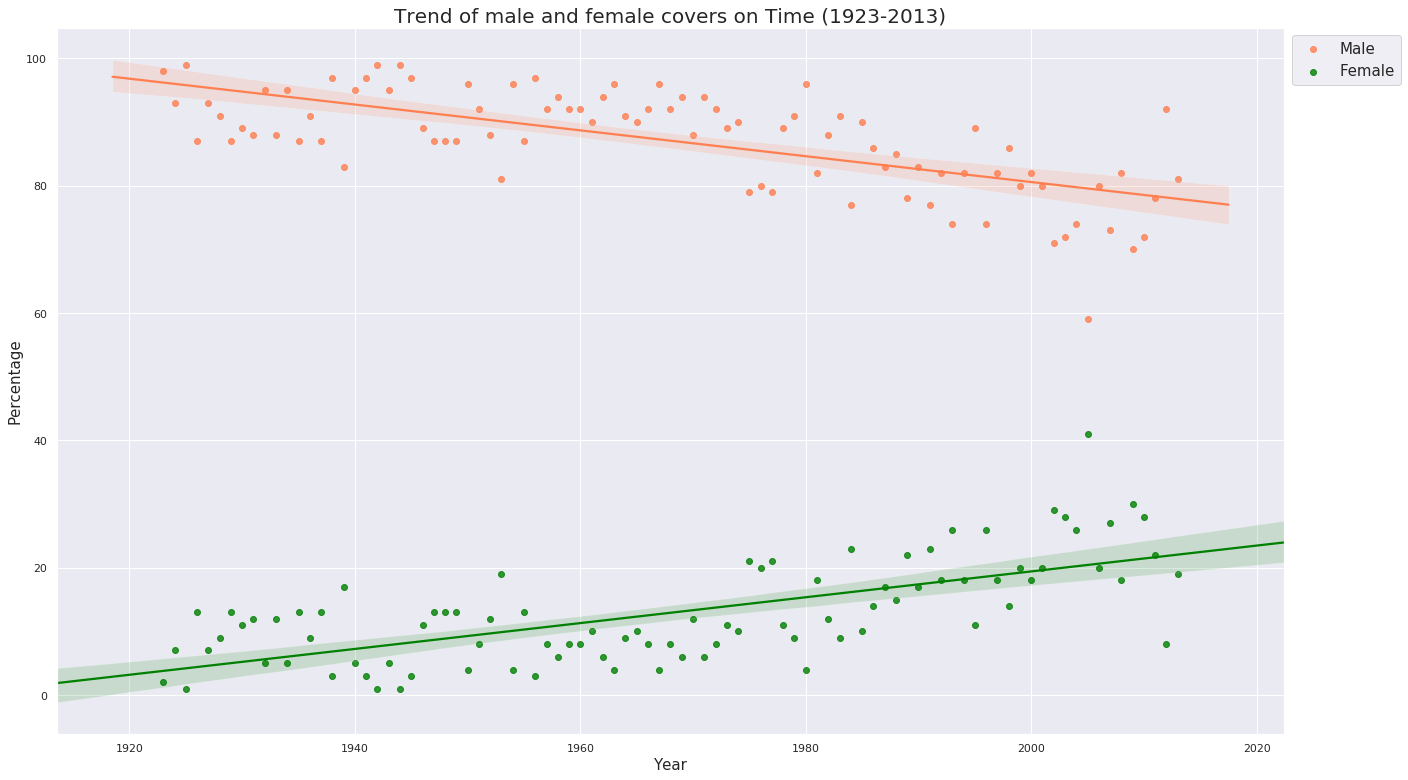

In [15]:
import seaborn as sns
plt.figure(figsize=(22,13))
sns.set(color_codes = True)
sns.set_style("darkgrid")
ax = sns.regplot(x="Year", y="MalePerc", data = data, color='#FF7F50', label='Male' )
ax1 = sns.regplot(x="Year", y="FemalePerc", data = data, color='#008000', label='Female')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.title('Trend of male and female covers on Time (1923-2013)', fontsize = 20)
plt.legend(bbox_to_anchor=(1,1), loc=2, prop={'size':15})
plt.show()

# **Conclusion**
<br>
* **From the stacked bar graph** :
The stacked bar graph above shows how the covers of Time for a period of 80 years have **preferred men over women** constantly and by a huge huge margin, especially during the early years and in some years of the 1940s. 

* **From the scatter plot** :
It is, though, a little consolation that the age-old trend has improved and increased (clearly visible from the negative sloped line for Males and positive-sloped line for Females) over the past years especially during the 1970s and continuously from 1980s, but with a dip in 1995 and again a continuous dip after 2005, which had the highest percentage of females ever from the beginning. It is for the authorities of Time to speak what happened after 2005 and in the years which saw the lowest percentage, years 1925, 1942 and 1944. 